In [1]:
from utils import write_loss, get_config, Timer
from trainer import MUNIT_Trainer, UNIT_Trainer
import torch.backends.cudnn as cudnn
import torch

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import json
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from fid_score import calculate_frechet_distance

from my_utils import (multiple_gpu_gen, multiple_gpu_dis,
                      load_dataset, LoaderSampler, tensor2img,
                      get_Z_pushed_loader_stats)

from IPython.display import clear_output

cudnn.benchmark = True

# Load experiment setting
opts_trainer = "MUNIT"
opts_output_path = "."
opts_resume = False
opts_config = "configs/handbags2shoes.yaml"


config = get_config(opts_config)
max_iter = config['max_iter']
display_size = config['display_size']
config['vgg_model_path'] = opts_output_path
batch_size = config['batch_size']

DEVICE_IDS = [0]
SEED = 0x000000

device = f'cuda:{DEVICE_IDS[0]}'

# Setup model and data loader
if opts_trainer == 'MUNIT':
    trainer = MUNIT_Trainer(config, device).to(device)
elif opts_trainer == 'UNIT':
    trainer = UNIT_Trainer(config).to(device)
else:
    sys.exit("Only support MUNIT|UNIT")

trainer.gen_a = multiple_gpu_gen(trainer.gen_a, DEVICE_IDS)
trainer.gen_b = multiple_gpu_gen(trainer.gen_b, DEVICE_IDS)

trainer.dis_a = multiple_gpu_dis(trainer.dis_a, DEVICE_IDS)
trainer.dis_b = multiple_gpu_dis(trainer.dis_b, DEVICE_IDS)

DATASET1, DATASET1_PATH = 'outdoor', '../data/outdoor_128.hdf5'
DATASET2, DATASET2_PATH = 'church', '../data/church_128.hdf5'

IMG_SIZE = 128

filename = 'stats/{}_{}_test.json'.format(DATASET2, IMG_SIZE)
with open(filename, 'r') as fp:
    data_stats = json.load(fp)
    mu_data, sigma_data = data_stats['mu'], data_stats['sigma']
del data_stats

torch.cuda.set_device(device)
torch.manual_seed(SEED)
np.random.seed(SEED)

train_loader_a, test_loader_a = load_dataset(DATASET1, DATASET1_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)
train_loader_b, test_loader_b = load_dataset(DATASET2, DATASET2_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)

X_sampler = LoaderSampler(train_loader_a)
X_test_sampler = LoaderSampler(test_loader_a)
Y_sampler = LoaderSampler(train_loader_b)
Y_test_sampler = LoaderSampler(test_loader_b)

torch.manual_seed(0xBADBEEF)
np.random.seed(0xBADBEEF)

X_fixed_arr = []
Y_fixed_arr = []
X_test_fixed_arr = []
Y_test_fixed_arr = []
for i in range(10):
    X_fixed_arr.append(X_sampler.sample(1))
    Y_fixed_arr.append(Y_sampler.sample(1))
    X_test_fixed_arr.append(X_test_sampler.sample(1))
    Y_test_fixed_arr.append(Y_test_sampler.sample(1))

X_fixed = torch.cat(X_fixed_arr)
Y_fixed = torch.cat(Y_fixed_arr)
X_test_fixed = torch.cat(X_test_fixed_arr)
Y_test_fixed = torch.cat(Y_test_fixed_arr)

print(f"X_fixed shape = {X_fixed.shape}")
print(f"Y_fixed shape = {Y_fixed.shape}")
# Setup logger and output folders
model_name = os.path.splitext(os.path.basename(opts_config))[0]

OUTPUT_PATH = '../checkpoints/MUNIT_nips/{}_{}_{}'.format(DATASET1, DATASET2, IMG_SIZE)
writer = SummaryWriter(os.path.join(OUTPUT_PATH, "tensorboard"))
path_to_save_fig = os.path.join(OUTPUT_PATH, "figs")
if not os.path.exists(path_to_save_fig):
    os.makedirs(path_to_save_fig)

path_to_save_models = os.path.join(OUTPUT_PATH, "models")
if not os.path.exists(path_to_save_models):
    os.makedirs(path_to_save_models)

/cache/selikhanovych/ot/MUNIT_nips/utils.py:101: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)


KeyboardInterrupt: 

Plotting, step = 990001
Step 990001, gen_a2b, train


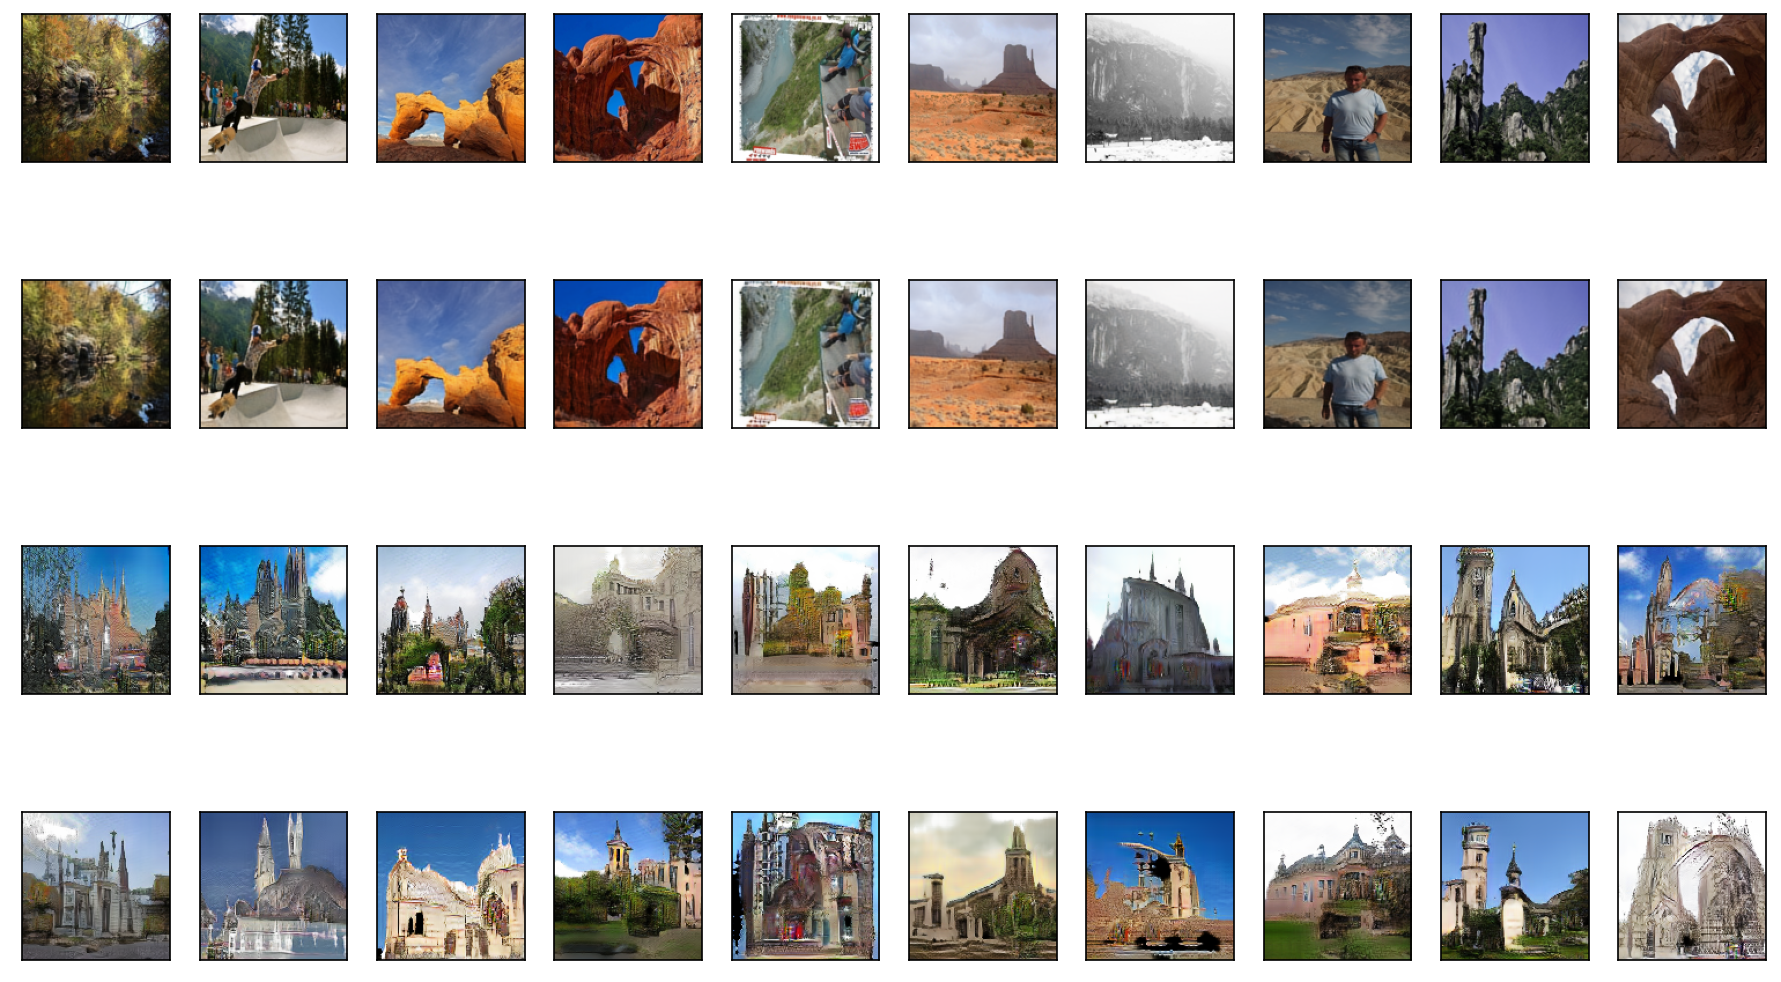

Step 990001, gen_a2b, test


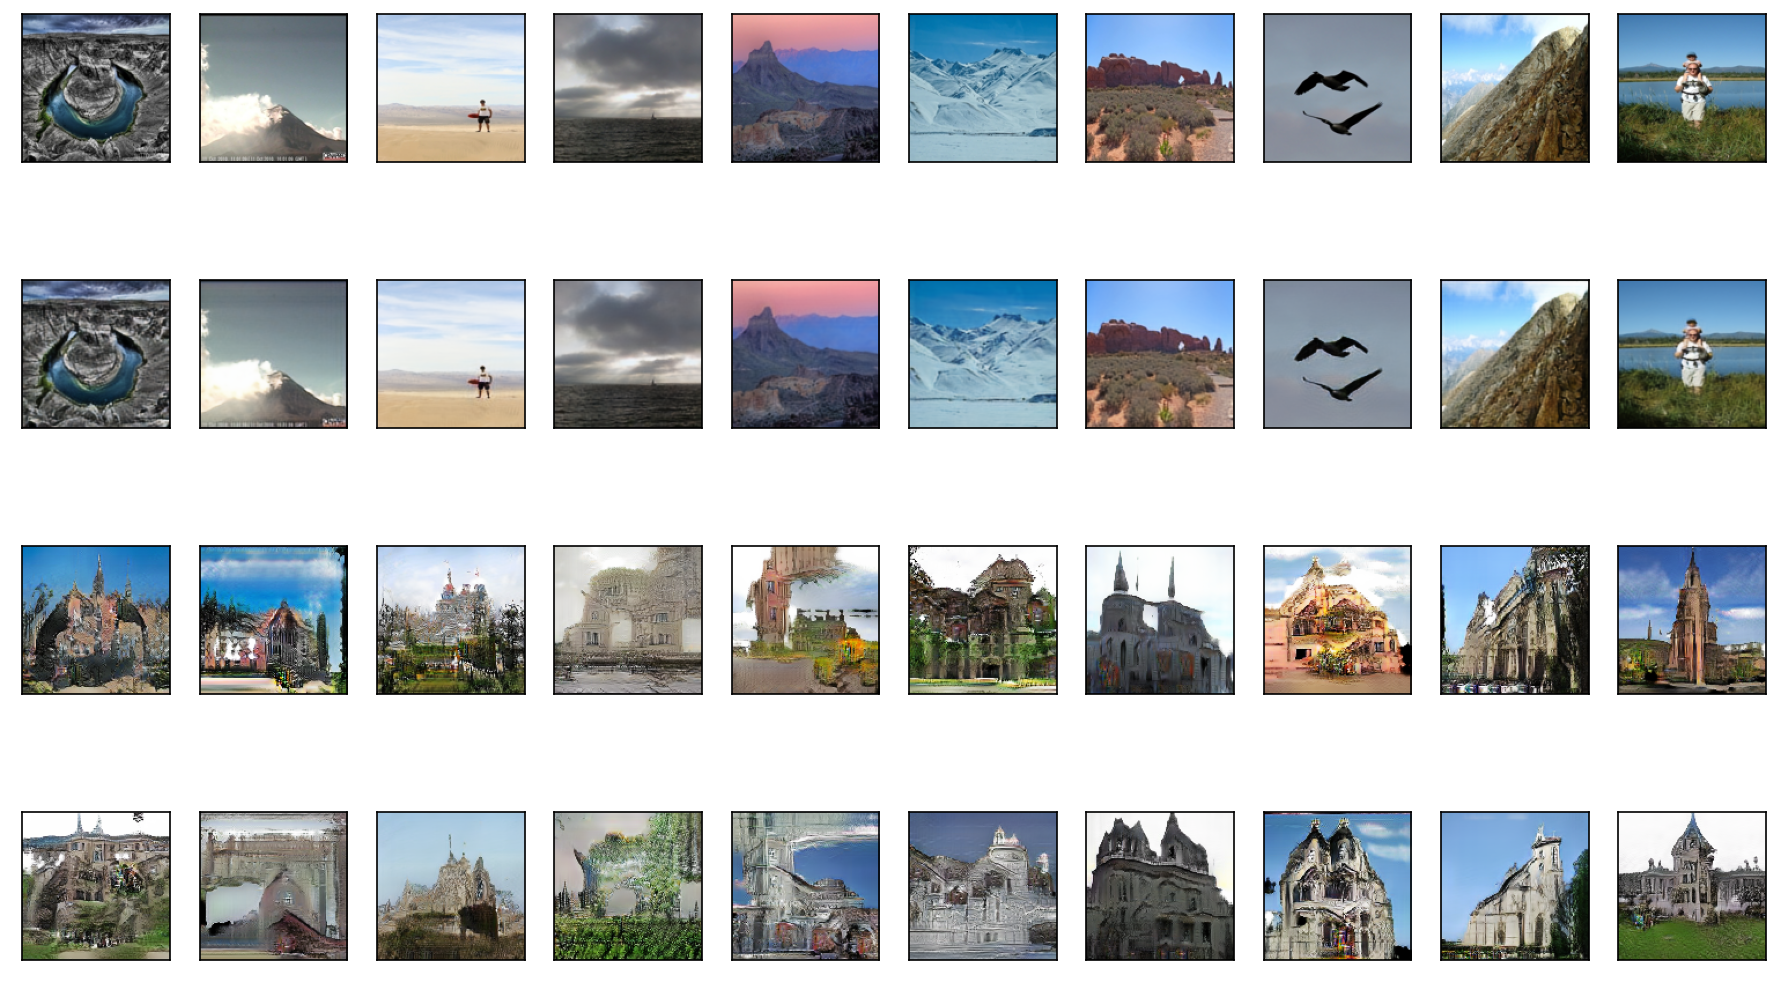

Step 990001, gen_b2a, train


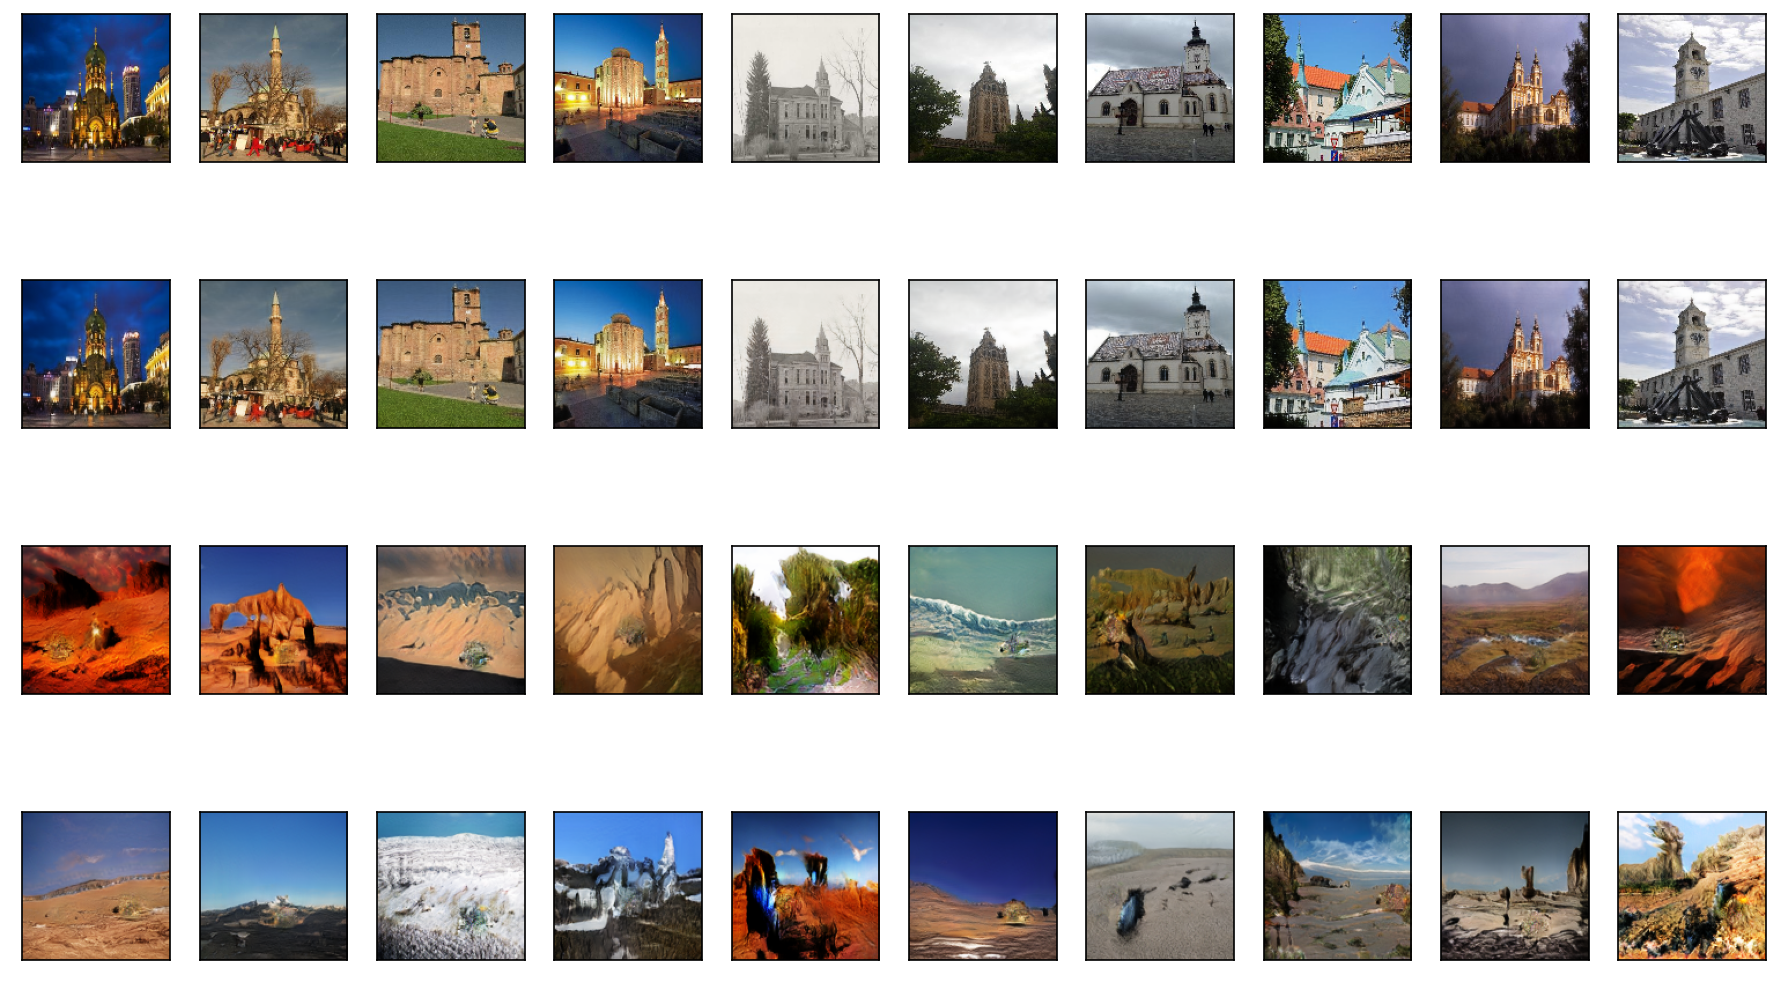

Step 990001, gen_b2a, test


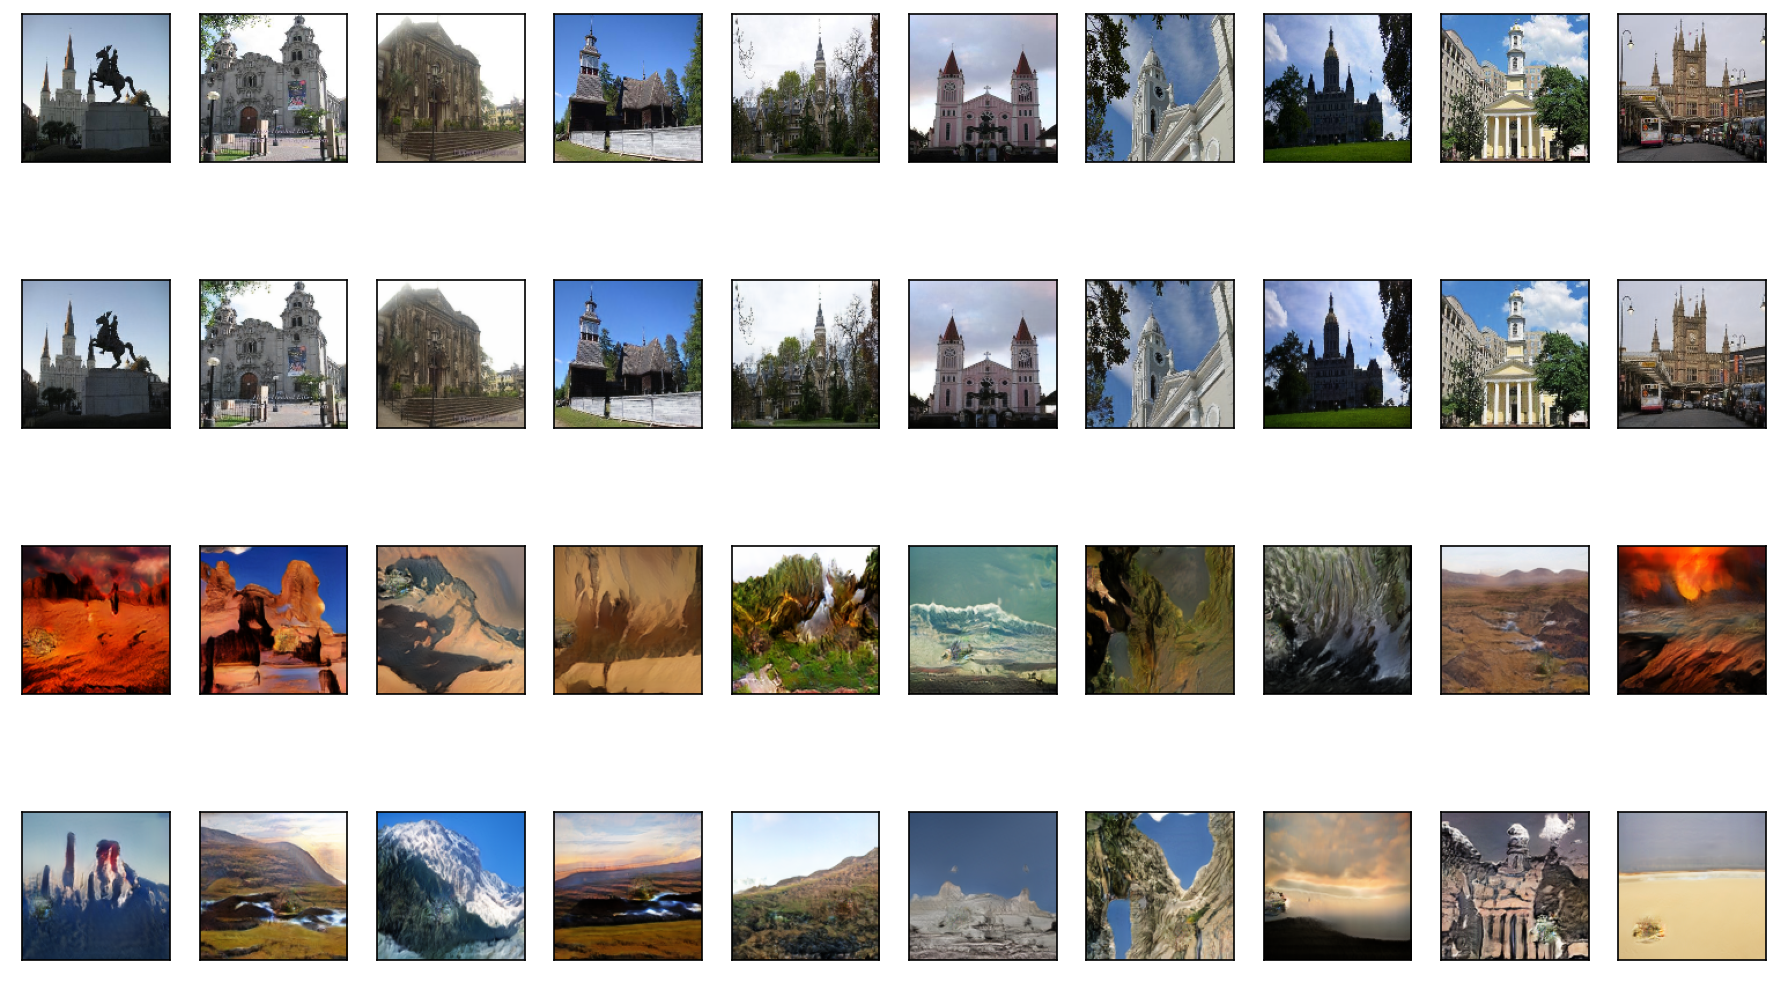

Computing FID
FID = 32.80460820836143, best_fid = 31.878997320347594, best iter = 760000
Elapsed time in update: 0.550035
Elapsed time in update: 0.128616
Elapsed time in update: 0.132564
Elapsed time in update: 0.125510
Elapsed time in update: 0.123011
Elapsed time in update: 0.124221
Elapsed time in update: 0.123493
Elapsed time in update: 0.123590
Elapsed time in update: 0.123037
Elapsed time in update: 0.122713
Iteration: 00990011/01000000
Elapsed time in update: 0.128031
Elapsed time in update: 0.162428
Elapsed time in update: 0.123770
Elapsed time in update: 0.124848
Elapsed time in update: 0.123242
Elapsed time in update: 0.124086
Elapsed time in update: 0.124586
Elapsed time in update: 0.124658
Elapsed time in update: 0.135366
Elapsed time in update: 0.125800
Iteration: 00990021/01000000
Elapsed time in update: 0.124273
Elapsed time in update: 0.122920
Elapsed time in update: 0.121613
Elapsed time in update: 0.123760
Elapsed time in update: 0.123457
Elapsed time in update: 0.12

Elapsed time in update: 0.126466
Elapsed time in update: 0.128301
Iteration: 00990231/01000000
Elapsed time in update: 0.125641
Elapsed time in update: 0.125438
Elapsed time in update: 0.126475
Elapsed time in update: 0.124018
Elapsed time in update: 0.139436
Elapsed time in update: 0.125665
Elapsed time in update: 0.126886
Elapsed time in update: 0.124059
Elapsed time in update: 0.123490
Elapsed time in update: 0.134776
Iteration: 00990241/01000000
Elapsed time in update: 0.126704
Elapsed time in update: 0.129050
Elapsed time in update: 0.126345
Elapsed time in update: 0.124868
Elapsed time in update: 0.125248
Elapsed time in update: 0.131843
Elapsed time in update: 0.125191
Elapsed time in update: 0.135197
Elapsed time in update: 0.144595
Elapsed time in update: 0.123137
Iteration: 00990251/01000000
Elapsed time in update: 0.124513
Elapsed time in update: 0.124551
Elapsed time in update: 0.124850
Elapsed time in update: 0.123590
Elapsed time in update: 0.123553
Elapsed time in update

Elapsed time in update: 0.125596
Elapsed time in update: 0.128564
Iteration: 00990461/01000000
Elapsed time in update: 0.127567
Elapsed time in update: 0.125041
Elapsed time in update: 0.123378
Elapsed time in update: 0.124373
Elapsed time in update: 0.124438
Elapsed time in update: 0.124223
Elapsed time in update: 0.124444
Elapsed time in update: 0.123982
Elapsed time in update: 0.125696
Elapsed time in update: 0.126070
Iteration: 00990471/01000000
Elapsed time in update: 0.126565
Elapsed time in update: 0.124833
Elapsed time in update: 0.127692
Elapsed time in update: 0.124433
Elapsed time in update: 0.124577
Elapsed time in update: 0.122469
Elapsed time in update: 0.126282
Elapsed time in update: 0.126073
Elapsed time in update: 0.128571
Elapsed time in update: 0.126498
Iteration: 00990481/01000000
Elapsed time in update: 0.128351
Elapsed time in update: 0.134514
Elapsed time in update: 0.128148
Elapsed time in update: 0.127425
Elapsed time in update: 0.140591
Elapsed time in update

Elapsed time in update: 0.125740
Elapsed time in update: 0.125986
Iteration: 00990691/01000000
Elapsed time in update: 0.126584
Elapsed time in update: 0.126767
Elapsed time in update: 0.126283
Elapsed time in update: 0.127959
Elapsed time in update: 0.128667
Elapsed time in update: 0.126667
Elapsed time in update: 0.124942
Elapsed time in update: 0.126657
Elapsed time in update: 0.127886
Elapsed time in update: 0.126761
Iteration: 00990701/01000000
Elapsed time in update: 0.146295
Elapsed time in update: 0.126216
Elapsed time in update: 0.127024
Elapsed time in update: 0.126897
Elapsed time in update: 0.137979
Elapsed time in update: 0.127918
Elapsed time in update: 0.127647
Elapsed time in update: 0.133159
Elapsed time in update: 0.125261
Elapsed time in update: 0.124691
Iteration: 00990711/01000000
Elapsed time in update: 0.149881
Elapsed time in update: 0.130999
Elapsed time in update: 0.147609
Elapsed time in update: 0.126827
Elapsed time in update: 0.127952
Elapsed time in update

Elapsed time in update: 0.124559
Elapsed time in update: 0.124893
Iteration: 00990921/01000000
Elapsed time in update: 0.128957
Elapsed time in update: 0.125459
Elapsed time in update: 0.127066
Elapsed time in update: 0.127180
Elapsed time in update: 0.126704
Elapsed time in update: 0.130781
Elapsed time in update: 0.144001
Elapsed time in update: 0.128240
Elapsed time in update: 0.125194
Elapsed time in update: 0.148738
Iteration: 00990931/01000000
Elapsed time in update: 0.148315
Elapsed time in update: 0.148491
Elapsed time in update: 0.136307
Elapsed time in update: 0.124475
Elapsed time in update: 0.128109
Elapsed time in update: 0.125207
Elapsed time in update: 0.126770
Elapsed time in update: 0.124507
Elapsed time in update: 0.124092
Elapsed time in update: 0.124529
Iteration: 00990941/01000000
Elapsed time in update: 0.124128
Elapsed time in update: 0.124004
Elapsed time in update: 0.125676
Elapsed time in update: 0.126667
Elapsed time in update: 0.126197
Elapsed time in update

Elapsed time in update: 0.125679
Elapsed time in update: 0.125777
Iteration: 00991151/01000000
Elapsed time in update: 0.148011
Elapsed time in update: 0.124975
Elapsed time in update: 0.124874
Elapsed time in update: 0.124553
Elapsed time in update: 0.145116
Elapsed time in update: 0.126487
Elapsed time in update: 0.124912
Elapsed time in update: 0.125859
Elapsed time in update: 0.125972
Elapsed time in update: 0.125692
Iteration: 00991161/01000000
Elapsed time in update: 0.124413
Elapsed time in update: 0.142346
Elapsed time in update: 0.126147
Elapsed time in update: 0.126389
Elapsed time in update: 0.124067
Elapsed time in update: 0.124482
Elapsed time in update: 0.126178
Elapsed time in update: 0.127046
Elapsed time in update: 0.126266
Elapsed time in update: 0.125304
Iteration: 00991171/01000000
Elapsed time in update: 0.136772
Elapsed time in update: 0.136123
Elapsed time in update: 0.134050
Elapsed time in update: 0.124764
Elapsed time in update: 0.162633
Elapsed time in update

Elapsed time in update: 0.125456
Elapsed time in update: 0.126826
Iteration: 00991381/01000000
Elapsed time in update: 0.124391
Elapsed time in update: 0.128181
Elapsed time in update: 0.130450
Elapsed time in update: 0.144112
Elapsed time in update: 0.125437
Elapsed time in update: 0.123792
Elapsed time in update: 0.126938
Elapsed time in update: 0.123976
Elapsed time in update: 0.124435
Elapsed time in update: 0.134532
Iteration: 00991391/01000000
Elapsed time in update: 0.127537
Elapsed time in update: 0.124279
Elapsed time in update: 0.124652
Elapsed time in update: 0.123616
Elapsed time in update: 0.124200
Elapsed time in update: 0.124129
Elapsed time in update: 0.123551
Elapsed time in update: 0.124943
Elapsed time in update: 0.125137
Elapsed time in update: 0.125942
Iteration: 00991401/01000000
Elapsed time in update: 0.128723
Elapsed time in update: 0.123943
Elapsed time in update: 0.124239
Elapsed time in update: 0.124498
Elapsed time in update: 0.123824
Elapsed time in update

Elapsed time in update: 0.124621
Elapsed time in update: 0.124927
Iteration: 00991611/01000000
Elapsed time in update: 0.125681
Elapsed time in update: 0.124555
Elapsed time in update: 0.125209
Elapsed time in update: 0.138189
Elapsed time in update: 0.124056
Elapsed time in update: 0.122778
Elapsed time in update: 0.123203
Elapsed time in update: 0.124668
Elapsed time in update: 0.149302
Elapsed time in update: 0.130429
Iteration: 00991621/01000000
Elapsed time in update: 0.125620
Elapsed time in update: 0.122809
Elapsed time in update: 0.123623
Elapsed time in update: 0.123899
Elapsed time in update: 0.125627
Elapsed time in update: 0.128268
Elapsed time in update: 0.128009
Elapsed time in update: 0.125425
Elapsed time in update: 0.123571
Elapsed time in update: 0.123285
Iteration: 00991631/01000000
Elapsed time in update: 0.126398
Elapsed time in update: 0.125134
Elapsed time in update: 0.155709
Elapsed time in update: 0.144482
Elapsed time in update: 0.134540
Elapsed time in update

Elapsed time in update: 0.123366
Elapsed time in update: 0.124845
Iteration: 00991841/01000000
Elapsed time in update: 0.124843
Elapsed time in update: 0.123303
Elapsed time in update: 0.151499
Elapsed time in update: 0.146781
Elapsed time in update: 0.125593
Elapsed time in update: 0.130331
Elapsed time in update: 0.143580
Elapsed time in update: 0.129707
Elapsed time in update: 0.124501
Elapsed time in update: 0.123709
Iteration: 00991851/01000000
Elapsed time in update: 0.125303
Elapsed time in update: 0.140566
Elapsed time in update: 0.138383
Elapsed time in update: 0.129617
Elapsed time in update: 0.145491
Elapsed time in update: 0.125287
Elapsed time in update: 0.124156
Elapsed time in update: 0.125836
Elapsed time in update: 0.124724
Elapsed time in update: 0.123935
Iteration: 00991861/01000000
Elapsed time in update: 0.124236
Elapsed time in update: 0.124305
Elapsed time in update: 0.125471
Elapsed time in update: 0.124749
Elapsed time in update: 0.124711
Elapsed time in update

Elapsed time in update: 0.124617
Elapsed time in update: 0.123999
Elapsed time in update: 0.168468
Iteration: 00992071/01000000
Elapsed time in update: 0.149767
Elapsed time in update: 0.154805
Elapsed time in update: 0.125461
Elapsed time in update: 0.125149
Elapsed time in update: 0.125221
Elapsed time in update: 0.125580
Elapsed time in update: 0.128394
Elapsed time in update: 0.126154
Elapsed time in update: 0.126487
Elapsed time in update: 0.126427
Iteration: 00992081/01000000
Elapsed time in update: 0.129613
Elapsed time in update: 0.132246
Elapsed time in update: 0.135806
Elapsed time in update: 0.151560
Elapsed time in update: 0.133741
Elapsed time in update: 0.127366
Elapsed time in update: 0.138902
Elapsed time in update: 0.132309
Elapsed time in update: 0.124495
Elapsed time in update: 0.131390
Iteration: 00992091/01000000
Elapsed time in update: 0.126201
Elapsed time in update: 0.129447
Elapsed time in update: 0.127589
Elapsed time in update: 0.136241
Elapsed time in update

Elapsed time in update: 0.124551
Elapsed time in update: 0.123777
Elapsed time in update: 0.123142
Iteration: 00992301/01000000
Elapsed time in update: 0.122706
Elapsed time in update: 0.121962
Elapsed time in update: 0.123727
Elapsed time in update: 0.125459
Elapsed time in update: 0.125436
Elapsed time in update: 0.124876
Elapsed time in update: 0.123137
Elapsed time in update: 0.122734
Elapsed time in update: 0.125708
Elapsed time in update: 0.127454
Iteration: 00992311/01000000
Elapsed time in update: 0.124767
Elapsed time in update: 0.123821
Elapsed time in update: 0.125274
Elapsed time in update: 0.125569
Elapsed time in update: 0.125397
Elapsed time in update: 0.123790
Elapsed time in update: 0.123778
Elapsed time in update: 0.123815
Elapsed time in update: 0.124642
Elapsed time in update: 0.127301
Iteration: 00992321/01000000
Elapsed time in update: 0.123427
Elapsed time in update: 0.125031
Elapsed time in update: 0.126172
Elapsed time in update: 0.122686
Elapsed time in update

Elapsed time in update: 0.125269
Elapsed time in update: 0.128417
Elapsed time in update: 0.125130
Iteration: 00992531/01000000
Elapsed time in update: 0.128119
Elapsed time in update: 0.125768
Elapsed time in update: 0.125546
Elapsed time in update: 0.125294
Elapsed time in update: 0.126769
Elapsed time in update: 0.125712
Elapsed time in update: 0.123796
Elapsed time in update: 0.125434
Elapsed time in update: 0.124299
Elapsed time in update: 0.126231
Iteration: 00992541/01000000
Elapsed time in update: 0.133572
Elapsed time in update: 0.126130
Elapsed time in update: 0.124789
Elapsed time in update: 0.122895
Elapsed time in update: 0.122483
Elapsed time in update: 0.125079
Elapsed time in update: 0.126750
Elapsed time in update: 0.140759
Elapsed time in update: 0.140236
Elapsed time in update: 0.134959
Iteration: 00992551/01000000
Elapsed time in update: 0.127293
Elapsed time in update: 0.127071
Elapsed time in update: 0.141567
Elapsed time in update: 0.124595
Elapsed time in update

Elapsed time in update: 0.265937
Elapsed time in update: 0.260077
Elapsed time in update: 0.260282
Elapsed time in update: 0.273046
Iteration: 00992761/01000000
Elapsed time in update: 0.258693
Elapsed time in update: 0.265187
Elapsed time in update: 0.272049
Elapsed time in update: 0.274344
Elapsed time in update: 0.204902
Elapsed time in update: 0.231652
Elapsed time in update: 0.258510
Elapsed time in update: 0.270129
Elapsed time in update: 0.257734
Elapsed time in update: 0.259571
Iteration: 00992771/01000000
Elapsed time in update: 0.271651
Elapsed time in update: 0.231961
Elapsed time in update: 0.162987
Elapsed time in update: 0.127595
Elapsed time in update: 0.126834
Elapsed time in update: 0.127769
Elapsed time in update: 0.165469
Elapsed time in update: 0.165259
Elapsed time in update: 0.181139
Elapsed time in update: 0.129083
Iteration: 00992781/01000000
Elapsed time in update: 0.126455
Elapsed time in update: 0.126064
Elapsed time in update: 0.125731
Elapsed time in update

Elapsed time in update: 0.125696
Elapsed time in update: 0.126792
Elapsed time in update: 0.125432
Elapsed time in update: 0.124564
Elapsed time in update: 0.126712
Iteration: 00992991/01000000
Elapsed time in update: 0.127609
Elapsed time in update: 0.123969
Elapsed time in update: 0.126001
Elapsed time in update: 0.123029
Elapsed time in update: 0.123748
Elapsed time in update: 0.154447
Elapsed time in update: 0.128855
Elapsed time in update: 0.150997
Elapsed time in update: 0.154732
Elapsed time in update: 0.126466
Iteration: 00993001/01000000
Elapsed time in update: 0.127915
Elapsed time in update: 0.130654
Elapsed time in update: 0.146197
Elapsed time in update: 0.127181
Elapsed time in update: 0.143580
Elapsed time in update: 0.130520
Elapsed time in update: 0.125972
Elapsed time in update: 0.124914
Elapsed time in update: 0.124975
Elapsed time in update: 0.124937
Iteration: 00993011/01000000
Elapsed time in update: 0.123934
Elapsed time in update: 0.143438
Elapsed time in update

Elapsed time in update: 0.122546
Elapsed time in update: 0.130809
Elapsed time in update: 0.125537
Elapsed time in update: 0.132703
Elapsed time in update: 0.125230
Iteration: 00993221/01000000
Elapsed time in update: 0.124804
Elapsed time in update: 0.123505
Elapsed time in update: 0.124187
Elapsed time in update: 0.123464
Elapsed time in update: 0.124562
Elapsed time in update: 0.124798
Elapsed time in update: 0.124703
Elapsed time in update: 0.126475
Elapsed time in update: 0.126160
Elapsed time in update: 0.124681
Iteration: 00993231/01000000
Elapsed time in update: 0.124032
Elapsed time in update: 0.124020
Elapsed time in update: 0.122929
Elapsed time in update: 0.124248
Elapsed time in update: 0.124630
Elapsed time in update: 0.123397
Elapsed time in update: 0.126080
Elapsed time in update: 0.124838
Elapsed time in update: 0.123873
Elapsed time in update: 0.124713
Iteration: 00993241/01000000
Elapsed time in update: 0.125068
Elapsed time in update: 0.124070
Elapsed time in update

Elapsed time in update: 0.125313
Elapsed time in update: 0.124330
Elapsed time in update: 0.125950
Elapsed time in update: 0.125186
Elapsed time in update: 0.127443
Iteration: 00993451/01000000
Elapsed time in update: 0.123031
Elapsed time in update: 0.124165
Elapsed time in update: 0.121582
Elapsed time in update: 0.128268
Elapsed time in update: 0.125947
Elapsed time in update: 0.130127
Elapsed time in update: 0.137202
Elapsed time in update: 0.126934
Elapsed time in update: 0.126676
Elapsed time in update: 0.136110
Iteration: 00993461/01000000
Elapsed time in update: 0.128700
Elapsed time in update: 0.125422
Elapsed time in update: 0.125258
Elapsed time in update: 0.160198
Elapsed time in update: 0.125331
Elapsed time in update: 0.129247
Elapsed time in update: 0.125648
Elapsed time in update: 0.124978
Elapsed time in update: 0.183331
Elapsed time in update: 0.126148
Iteration: 00993471/01000000
Elapsed time in update: 0.143009
Elapsed time in update: 0.126274
Elapsed time in update

Elapsed time in update: 0.122880
Elapsed time in update: 0.123711
Elapsed time in update: 0.125067
Elapsed time in update: 0.129047
Elapsed time in update: 0.123831
Iteration: 00993681/01000000
Elapsed time in update: 0.124047
Elapsed time in update: 0.126262
Elapsed time in update: 0.125971
Elapsed time in update: 0.125429
Elapsed time in update: 0.124187
Elapsed time in update: 0.123708
Elapsed time in update: 0.122434
Elapsed time in update: 0.123772
Elapsed time in update: 0.124987
Elapsed time in update: 0.127182
Iteration: 00993691/01000000
Elapsed time in update: 0.125625
Elapsed time in update: 0.131070
Elapsed time in update: 0.123480
Elapsed time in update: 0.123576
Elapsed time in update: 0.123280
Elapsed time in update: 0.127697
Elapsed time in update: 0.132026
Elapsed time in update: 0.125162
Elapsed time in update: 0.126108
Elapsed time in update: 0.125733
Iteration: 00993701/01000000
Elapsed time in update: 0.136443
Elapsed time in update: 0.125767
Elapsed time in update

Elapsed time in update: 0.124017
Elapsed time in update: 0.127512
Elapsed time in update: 0.136285
Elapsed time in update: 0.123641
Elapsed time in update: 0.121823
Iteration: 00993911/01000000
Elapsed time in update: 0.122990
Elapsed time in update: 0.127392
Elapsed time in update: 0.133135
Elapsed time in update: 0.133659
Elapsed time in update: 0.134440
Elapsed time in update: 0.126339
Elapsed time in update: 0.130244
Elapsed time in update: 0.131415
Elapsed time in update: 0.132992
Elapsed time in update: 0.125787
Iteration: 00993921/01000000
Elapsed time in update: 0.154920
Elapsed time in update: 0.128038
Elapsed time in update: 0.124673
Elapsed time in update: 0.123808
Elapsed time in update: 0.122858
Elapsed time in update: 0.123903
Elapsed time in update: 0.123785
Elapsed time in update: 0.126005
Elapsed time in update: 0.125113
Elapsed time in update: 0.124299
Iteration: 00993931/01000000
Elapsed time in update: 0.123350
Elapsed time in update: 0.125998
Elapsed time in update

Elapsed time in update: 0.127101
Elapsed time in update: 0.125841
Elapsed time in update: 0.151447
Elapsed time in update: 0.125082
Elapsed time in update: 0.126832
Iteration: 00994141/01000000
Elapsed time in update: 0.124528
Elapsed time in update: 0.125817
Elapsed time in update: 0.124763
Elapsed time in update: 0.124563
Elapsed time in update: 0.123411
Elapsed time in update: 0.122757
Elapsed time in update: 0.124015
Elapsed time in update: 0.124005
Elapsed time in update: 0.124010
Elapsed time in update: 0.125322
Iteration: 00994151/01000000
Elapsed time in update: 0.124410
Elapsed time in update: 0.123079
Elapsed time in update: 0.123213
Elapsed time in update: 0.124183
Elapsed time in update: 0.125282
Elapsed time in update: 0.124283
Elapsed time in update: 0.124610
Elapsed time in update: 0.125054
Elapsed time in update: 0.146916
Elapsed time in update: 0.127066
Iteration: 00994161/01000000
Elapsed time in update: 0.125424
Elapsed time in update: 0.124343
Elapsed time in update

Elapsed time in update: 0.124776
Elapsed time in update: 0.122987
Elapsed time in update: 0.131181
Elapsed time in update: 0.132051
Elapsed time in update: 0.125559
Iteration: 00994371/01000000
Elapsed time in update: 0.129933
Elapsed time in update: 0.130403
Elapsed time in update: 0.130218
Elapsed time in update: 0.127710
Elapsed time in update: 0.142615
Elapsed time in update: 0.125259
Elapsed time in update: 0.123768
Elapsed time in update: 0.123492
Elapsed time in update: 0.122258
Elapsed time in update: 0.123536
Iteration: 00994381/01000000
Elapsed time in update: 0.123321
Elapsed time in update: 0.131063
Elapsed time in update: 0.123241
Elapsed time in update: 0.125530
Elapsed time in update: 0.125104
Elapsed time in update: 0.126461
Elapsed time in update: 0.129839
Elapsed time in update: 0.123809
Elapsed time in update: 0.123664
Elapsed time in update: 0.124115
Iteration: 00994391/01000000
Elapsed time in update: 0.123477
Elapsed time in update: 0.124871
Elapsed time in update

Elapsed time in update: 0.141189
Elapsed time in update: 0.125456
Elapsed time in update: 0.127156
Elapsed time in update: 0.124495
Elapsed time in update: 0.125279
Elapsed time in update: 0.124470
Iteration: 00994601/01000000
Elapsed time in update: 0.124604
Elapsed time in update: 0.131946
Elapsed time in update: 0.126267
Elapsed time in update: 0.124982
Elapsed time in update: 0.125547
Elapsed time in update: 0.123319
Elapsed time in update: 0.124375
Elapsed time in update: 0.123664
Elapsed time in update: 0.124988
Elapsed time in update: 0.127367
Iteration: 00994611/01000000
Elapsed time in update: 0.126510
Elapsed time in update: 0.125854
Elapsed time in update: 0.123812
Elapsed time in update: 0.123805
Elapsed time in update: 0.123674
Elapsed time in update: 0.124307
Elapsed time in update: 0.126650
Elapsed time in update: 0.124298
Elapsed time in update: 0.126181
Elapsed time in update: 0.125035
Iteration: 00994621/01000000
Elapsed time in update: 0.123489
Elapsed time in update

Elapsed time in update: 0.125035
Elapsed time in update: 0.124263
Elapsed time in update: 0.127501
Elapsed time in update: 0.125164
Elapsed time in update: 0.125722
Elapsed time in update: 0.127086
Iteration: 00994831/01000000
Elapsed time in update: 0.174079
Elapsed time in update: 0.158070
Elapsed time in update: 0.127858
Elapsed time in update: 0.128206
Elapsed time in update: 0.131179
Elapsed time in update: 0.122079
Elapsed time in update: 0.150648
Elapsed time in update: 0.167930
Elapsed time in update: 0.246153
Elapsed time in update: 0.260289
Iteration: 00994841/01000000
Elapsed time in update: 0.258440
Elapsed time in update: 0.187034
Elapsed time in update: 0.275123
Elapsed time in update: 0.285275
Elapsed time in update: 0.292923
Elapsed time in update: 0.259814
Elapsed time in update: 0.271014
Elapsed time in update: 0.284643
Elapsed time in update: 0.280825
Elapsed time in update: 0.248939
Iteration: 00994851/01000000
Elapsed time in update: 0.273413
Elapsed time in update

Elapsed time in update: 0.121264
Elapsed time in update: 0.124801
Elapsed time in update: 0.124179
Elapsed time in update: 0.122606
Elapsed time in update: 0.122458
Elapsed time in update: 0.122122
Elapsed time in update: 0.123998
Iteration: 00995061/01000000
Elapsed time in update: 0.123377
Elapsed time in update: 0.122056
Elapsed time in update: 0.122672
Elapsed time in update: 0.124094
Elapsed time in update: 0.124011
Elapsed time in update: 0.121750
Elapsed time in update: 0.123246
Elapsed time in update: 0.123778
Elapsed time in update: 0.123783
Elapsed time in update: 0.124692
Iteration: 00995071/01000000
Elapsed time in update: 0.122653
Elapsed time in update: 0.124425
Elapsed time in update: 0.124755
Elapsed time in update: 0.123053
Elapsed time in update: 0.121833
Elapsed time in update: 0.122993
Elapsed time in update: 0.155958
Elapsed time in update: 0.139211
Elapsed time in update: 0.121591
Elapsed time in update: 0.123015
Iteration: 00995081/01000000
Elapsed time in update

Elapsed time in update: 0.122757
Elapsed time in update: 0.136661
Elapsed time in update: 0.123721
Elapsed time in update: 0.123417
Elapsed time in update: 0.123737
Elapsed time in update: 0.121715
Elapsed time in update: 0.123562
Iteration: 00995291/01000000
Elapsed time in update: 0.122490
Elapsed time in update: 0.122942
Elapsed time in update: 0.122620
Elapsed time in update: 0.125425
Elapsed time in update: 0.123413
Elapsed time in update: 0.123877
Elapsed time in update: 0.122098
Elapsed time in update: 0.122685
Elapsed time in update: 0.121698
Elapsed time in update: 0.123201
Iteration: 00995301/01000000
Elapsed time in update: 0.123400
Elapsed time in update: 0.122874
Elapsed time in update: 0.124655
Elapsed time in update: 0.124225
Elapsed time in update: 0.124280
Elapsed time in update: 0.127487
Elapsed time in update: 0.125368
Elapsed time in update: 0.125643
Elapsed time in update: 0.123173
Elapsed time in update: 0.122303
Iteration: 00995311/01000000
Elapsed time in update

Elapsed time in update: 0.123171
Elapsed time in update: 0.122504
Elapsed time in update: 0.125073
Elapsed time in update: 0.124426
Elapsed time in update: 0.123399
Elapsed time in update: 0.130563
Elapsed time in update: 0.125177
Iteration: 00995521/01000000
Elapsed time in update: 0.125254
Elapsed time in update: 0.123543
Elapsed time in update: 0.122816
Elapsed time in update: 0.124192
Elapsed time in update: 0.123641
Elapsed time in update: 0.122379
Elapsed time in update: 0.122575
Elapsed time in update: 0.153581
Elapsed time in update: 0.124274
Elapsed time in update: 0.123021
Iteration: 00995531/01000000
Elapsed time in update: 0.121935
Elapsed time in update: 0.123068
Elapsed time in update: 0.123122
Elapsed time in update: 0.123396
Elapsed time in update: 0.123493
Elapsed time in update: 0.124247
Elapsed time in update: 0.123098
Elapsed time in update: 0.122636
Elapsed time in update: 0.122125
Elapsed time in update: 0.123057
Iteration: 00995541/01000000
Elapsed time in update

Elapsed time in update: 0.121899
Elapsed time in update: 0.136118
Elapsed time in update: 0.123524
Elapsed time in update: 0.123300
Elapsed time in update: 0.123495
Elapsed time in update: 0.128709
Elapsed time in update: 0.126507
Elapsed time in update: 0.123462
Iteration: 00995751/01000000
Elapsed time in update: 0.140459
Elapsed time in update: 0.138889
Elapsed time in update: 0.133955
Elapsed time in update: 0.125433
Elapsed time in update: 0.124497
Elapsed time in update: 0.131879
Elapsed time in update: 0.126508
Elapsed time in update: 0.127404
Elapsed time in update: 0.122137
Elapsed time in update: 0.122641
Iteration: 00995761/01000000
Elapsed time in update: 0.122697
Elapsed time in update: 0.126480
Elapsed time in update: 0.125003
Elapsed time in update: 0.125157
Elapsed time in update: 0.126670
Elapsed time in update: 0.122286
Elapsed time in update: 0.122397
Elapsed time in update: 0.128912
Elapsed time in update: 0.124436
Elapsed time in update: 0.124992
Iteration: 0099577

Elapsed time in update: 0.123748
Elapsed time in update: 0.121790
Elapsed time in update: 0.121535
Elapsed time in update: 0.127104
Elapsed time in update: 0.124981
Elapsed time in update: 0.123988
Elapsed time in update: 0.124841
Elapsed time in update: 0.122340
Iteration: 00995981/01000000
Elapsed time in update: 0.122497
Elapsed time in update: 0.123004
Elapsed time in update: 0.122438
Elapsed time in update: 0.123219
Elapsed time in update: 0.123576
Elapsed time in update: 0.128038
Elapsed time in update: 0.143301
Elapsed time in update: 0.122965
Elapsed time in update: 0.123937
Elapsed time in update: 0.122831
Iteration: 00995991/01000000
Elapsed time in update: 0.121297
Elapsed time in update: 0.123875
Elapsed time in update: 0.123764
Elapsed time in update: 0.137751
Elapsed time in update: 0.124111
Elapsed time in update: 0.123860
Elapsed time in update: 0.123596
Elapsed time in update: 0.121915
Elapsed time in update: 0.121628
Elapsed time in update: 0.151083
Iteration: 0099600

Elapsed time in update: 0.124543
Elapsed time in update: 0.123015
Elapsed time in update: 0.125361
Elapsed time in update: 0.122889
Elapsed time in update: 0.122380
Elapsed time in update: 0.121731
Elapsed time in update: 0.127252
Elapsed time in update: 0.126543
Iteration: 00996211/01000000
Elapsed time in update: 0.123965
Elapsed time in update: 0.123474
Elapsed time in update: 0.126223
Elapsed time in update: 0.123024
Elapsed time in update: 0.123208
Elapsed time in update: 0.126712
Elapsed time in update: 0.122813
Elapsed time in update: 0.125228
Elapsed time in update: 0.127908
Elapsed time in update: 0.123940
Iteration: 00996221/01000000
Elapsed time in update: 0.123105
Elapsed time in update: 0.125908
Elapsed time in update: 0.124476
Elapsed time in update: 0.123221
Elapsed time in update: 0.127010
Elapsed time in update: 0.147337
Elapsed time in update: 0.145479
Elapsed time in update: 0.124757
Elapsed time in update: 0.138905
Elapsed time in update: 0.129856
Iteration: 0099623

Elapsed time in update: 0.127106
Elapsed time in update: 0.123396
Elapsed time in update: 0.127243
Elapsed time in update: 0.122292
Elapsed time in update: 0.126143
Elapsed time in update: 0.125123
Elapsed time in update: 0.131669
Elapsed time in update: 0.125643
Iteration: 00996441/01000000
Elapsed time in update: 0.124736
Elapsed time in update: 0.133030
Elapsed time in update: 0.123353
Elapsed time in update: 0.121997
Elapsed time in update: 0.123143
Elapsed time in update: 0.124675
Elapsed time in update: 0.123722
Elapsed time in update: 0.125224
Elapsed time in update: 0.123068
Elapsed time in update: 0.123951
Iteration: 00996451/01000000
Elapsed time in update: 0.124379
Elapsed time in update: 0.121815
Elapsed time in update: 0.122553
Elapsed time in update: 0.145769
Elapsed time in update: 0.144904
Elapsed time in update: 0.144515
Elapsed time in update: 0.145291
Elapsed time in update: 0.144297
Elapsed time in update: 0.143388
Elapsed time in update: 0.142157
Iteration: 0099646

Elapsed time in update: 0.123814
Elapsed time in update: 0.122780
Elapsed time in update: 0.123733
Elapsed time in update: 0.126328
Elapsed time in update: 0.124607
Elapsed time in update: 0.123166
Elapsed time in update: 0.124215
Elapsed time in update: 0.126740
Iteration: 00996671/01000000
Elapsed time in update: 0.123288
Elapsed time in update: 0.123969
Elapsed time in update: 0.124915
Elapsed time in update: 0.123066
Elapsed time in update: 0.122854
Elapsed time in update: 0.124288
Elapsed time in update: 0.123951
Elapsed time in update: 0.123751
Elapsed time in update: 0.126066
Elapsed time in update: 0.124463
Iteration: 00996681/01000000
Elapsed time in update: 0.123189
Elapsed time in update: 0.122791
Elapsed time in update: 0.124663
Elapsed time in update: 0.122817
Elapsed time in update: 0.125236
Elapsed time in update: 0.124707
Elapsed time in update: 0.124876
Elapsed time in update: 0.125530
Elapsed time in update: 0.125484
Elapsed time in update: 0.123961
Iteration: 0099669

Elapsed time in update: 0.126966
Elapsed time in update: 0.125361
Elapsed time in update: 0.126273
Elapsed time in update: 0.132505
Elapsed time in update: 0.137411
Elapsed time in update: 0.132646
Elapsed time in update: 0.142562
Elapsed time in update: 0.130658
Iteration: 00996901/01000000
Elapsed time in update: 0.133451
Elapsed time in update: 0.130963
Elapsed time in update: 0.130544
Elapsed time in update: 0.127976
Elapsed time in update: 0.130028
Elapsed time in update: 0.123201
Elapsed time in update: 0.138147
Elapsed time in update: 0.126986
Elapsed time in update: 0.124825
Elapsed time in update: 0.124820
Iteration: 00996911/01000000
Elapsed time in update: 0.131923
Elapsed time in update: 0.123578
Elapsed time in update: 0.123902
Elapsed time in update: 0.125736
Elapsed time in update: 0.125887
Elapsed time in update: 0.125322
Elapsed time in update: 0.140476
Elapsed time in update: 0.125324
Elapsed time in update: 0.125204
Elapsed time in update: 0.123435
Iteration: 0099692

Elapsed time in update: 0.123483
Elapsed time in update: 0.124318
Elapsed time in update: 0.124119
Elapsed time in update: 0.123091
Elapsed time in update: 0.124366
Elapsed time in update: 0.125159
Elapsed time in update: 0.125326
Elapsed time in update: 0.123919
Iteration: 00997131/01000000
Elapsed time in update: 0.124556
Elapsed time in update: 0.124207
Elapsed time in update: 0.126136
Elapsed time in update: 0.124181
Elapsed time in update: 0.123641
Elapsed time in update: 0.125103
Elapsed time in update: 0.125495
Elapsed time in update: 0.124783
Elapsed time in update: 0.124284
Elapsed time in update: 0.123672
Iteration: 00997141/01000000
Elapsed time in update: 0.122845
Elapsed time in update: 0.123121
Elapsed time in update: 0.123345
Elapsed time in update: 0.123528
Elapsed time in update: 0.123715
Elapsed time in update: 0.123633
Elapsed time in update: 0.123094
Elapsed time in update: 0.125814
Elapsed time in update: 0.123263
Elapsed time in update: 0.134142
Iteration: 0099715

Elapsed time in update: 0.125756
Elapsed time in update: 0.124911
Elapsed time in update: 0.122770
Elapsed time in update: 0.123614
Elapsed time in update: 0.122913
Elapsed time in update: 0.124853
Elapsed time in update: 0.124681
Elapsed time in update: 0.131527
Iteration: 00997361/01000000
Elapsed time in update: 0.144997
Elapsed time in update: 0.122944
Elapsed time in update: 0.122688
Elapsed time in update: 0.124351
Elapsed time in update: 0.125320
Elapsed time in update: 0.125477
Elapsed time in update: 0.124416
Elapsed time in update: 0.124584
Elapsed time in update: 0.129387
Elapsed time in update: 0.122976
Iteration: 00997371/01000000
Elapsed time in update: 0.123754
Elapsed time in update: 0.122897
Elapsed time in update: 0.124448
Elapsed time in update: 0.122164
Elapsed time in update: 0.123392
Elapsed time in update: 0.124572
Elapsed time in update: 0.123671
Elapsed time in update: 0.121458
Elapsed time in update: 0.121708
Elapsed time in update: 0.121892
Iteration: 0099738

Elapsed time in update: 0.124478
Elapsed time in update: 0.123590
Elapsed time in update: 0.124438
Elapsed time in update: 0.123523
Elapsed time in update: 0.127021
Elapsed time in update: 0.125421
Elapsed time in update: 0.127099
Elapsed time in update: 0.125446
Iteration: 00997591/01000000
Elapsed time in update: 0.123746
Elapsed time in update: 0.123334
Elapsed time in update: 0.125459
Elapsed time in update: 0.123776
Elapsed time in update: 0.127295
Elapsed time in update: 0.125425
Elapsed time in update: 0.124374
Elapsed time in update: 0.123379
Elapsed time in update: 0.124228
Elapsed time in update: 0.125700
Iteration: 00997601/01000000
Elapsed time in update: 0.124529
Elapsed time in update: 0.125094
Elapsed time in update: 0.129313
Elapsed time in update: 0.125746
Elapsed time in update: 0.124932
Elapsed time in update: 0.139296
Elapsed time in update: 0.124181
Elapsed time in update: 0.123168
Elapsed time in update: 0.123434
Elapsed time in update: 0.143650
Iteration: 0099761

Elapsed time in update: 0.248495
Elapsed time in update: 0.242587
Elapsed time in update: 0.258609
Elapsed time in update: 0.172870
Elapsed time in update: 0.214936
Elapsed time in update: 0.215991
Elapsed time in update: 0.131804
Elapsed time in update: 0.204699
Elapsed time in update: 0.247139
Iteration: 00997821/01000000
Elapsed time in update: 0.280651
Elapsed time in update: 0.247871
Elapsed time in update: 0.243029
Elapsed time in update: 0.236547
Elapsed time in update: 0.246836
Elapsed time in update: 0.267724
Elapsed time in update: 0.258078
Elapsed time in update: 0.261896
Elapsed time in update: 0.137383
Elapsed time in update: 0.123360
Iteration: 00997831/01000000
Elapsed time in update: 0.126669
Elapsed time in update: 0.222641
Elapsed time in update: 0.222338
Elapsed time in update: 0.157458
Elapsed time in update: 0.222429
Elapsed time in update: 0.169973
Elapsed time in update: 0.205123
Elapsed time in update: 0.203024
Elapsed time in update: 0.308167
Elapsed time in up

Elapsed time in update: 0.124005
Elapsed time in update: 0.124170
Elapsed time in update: 0.125461
Elapsed time in update: 0.123005
Elapsed time in update: 0.141442
Elapsed time in update: 0.123833
Elapsed time in update: 0.124763
Elapsed time in update: 0.124912
Elapsed time in update: 0.124411
Elapsed time in update: 0.124281
Iteration: 00998051/01000000
Elapsed time in update: 0.123596
Elapsed time in update: 0.122856
Elapsed time in update: 0.125072
Elapsed time in update: 0.123508
Elapsed time in update: 0.127584
Elapsed time in update: 0.124211
Elapsed time in update: 0.124443
Elapsed time in update: 0.123094
Elapsed time in update: 0.140026
Elapsed time in update: 0.123572
Iteration: 00998061/01000000
Elapsed time in update: 0.123397
Elapsed time in update: 0.123301
Elapsed time in update: 0.124245
Elapsed time in update: 0.122586
Elapsed time in update: 0.153916
Elapsed time in update: 0.145118
Elapsed time in update: 0.123930
Elapsed time in update: 0.122237
Elapsed time in up

Elapsed time in update: 0.124958
Elapsed time in update: 0.125695
Elapsed time in update: 0.125234
Elapsed time in update: 0.125256
Elapsed time in update: 0.125378
Elapsed time in update: 0.123179
Elapsed time in update: 0.123840
Elapsed time in update: 0.125755
Elapsed time in update: 0.123879
Elapsed time in update: 0.123177
Iteration: 00998281/01000000
Elapsed time in update: 0.124919
Elapsed time in update: 0.124942
Elapsed time in update: 0.126388
Elapsed time in update: 0.125400
Elapsed time in update: 0.122718
Elapsed time in update: 0.124464
Elapsed time in update: 0.124395
Elapsed time in update: 0.124342
Elapsed time in update: 0.124619
Elapsed time in update: 0.126113
Iteration: 00998291/01000000
Elapsed time in update: 0.124482
Elapsed time in update: 0.123565
Elapsed time in update: 0.124011
Elapsed time in update: 0.123764
Elapsed time in update: 0.145863
Elapsed time in update: 0.123731
Elapsed time in update: 0.127874
Elapsed time in update: 0.126738
Elapsed time in up

Elapsed time in update: 0.125815
Elapsed time in update: 0.125862
Elapsed time in update: 0.124947
Elapsed time in update: 0.123734
Elapsed time in update: 0.123516
Elapsed time in update: 0.124300
Elapsed time in update: 0.123028
Elapsed time in update: 0.123641
Elapsed time in update: 0.124433
Elapsed time in update: 0.124316
Iteration: 00998511/01000000
Elapsed time in update: 0.125598
Elapsed time in update: 0.125011
Elapsed time in update: 0.125732
Elapsed time in update: 0.124710
Elapsed time in update: 0.124161
Elapsed time in update: 0.122244
Elapsed time in update: 0.122982
Elapsed time in update: 0.123405
Elapsed time in update: 0.123555
Elapsed time in update: 0.124914
Iteration: 00998521/01000000
Elapsed time in update: 0.127050
Elapsed time in update: 0.124762
Elapsed time in update: 0.125312
Elapsed time in update: 0.124377
Elapsed time in update: 0.126970
Elapsed time in update: 0.124017
Elapsed time in update: 0.125510
Elapsed time in update: 0.124994
Elapsed time in up

Elapsed time in update: 0.123823
Elapsed time in update: 0.122814
Elapsed time in update: 0.123529
Elapsed time in update: 0.126996
Elapsed time in update: 0.125845
Elapsed time in update: 0.123753
Elapsed time in update: 0.123132
Elapsed time in update: 0.126514
Elapsed time in update: 0.124159
Elapsed time in update: 0.122525
Iteration: 00998741/01000000
Elapsed time in update: 0.123311
Elapsed time in update: 0.124007
Elapsed time in update: 0.125198
Elapsed time in update: 0.124274
Elapsed time in update: 0.123661
Elapsed time in update: 0.128296
Elapsed time in update: 0.125100
Elapsed time in update: 0.138094
Elapsed time in update: 0.125669
Elapsed time in update: 0.126255
Iteration: 00998751/01000000
Elapsed time in update: 0.132507
Elapsed time in update: 0.125181
Elapsed time in update: 0.123066
Elapsed time in update: 0.124646
Elapsed time in update: 0.152354
Elapsed time in update: 0.124759
Elapsed time in update: 0.124864
Elapsed time in update: 0.125949
Elapsed time in up

Elapsed time in update: 0.121223
Iteration: 00998961/01000000
Elapsed time in update: 0.122570
Elapsed time in update: 0.122556
Elapsed time in update: 0.131411
Elapsed time in update: 0.136652
Elapsed time in update: 0.124794
Elapsed time in update: 0.123199
Elapsed time in update: 0.121765
Elapsed time in update: 0.121765
Elapsed time in update: 0.123665
Elapsed time in update: 0.122425
Iteration: 00998971/01000000
Elapsed time in update: 0.125024
Elapsed time in update: 0.127284
Elapsed time in update: 0.125061
Elapsed time in update: 0.126498
Elapsed time in update: 0.127165
Elapsed time in update: 0.131212
Elapsed time in update: 0.125512
Elapsed time in update: 0.154092
Elapsed time in update: 0.128030
Elapsed time in update: 0.125654
Iteration: 00998981/01000000
Elapsed time in update: 0.125172
Elapsed time in update: 0.122573
Elapsed time in update: 0.142213
Elapsed time in update: 0.122168
Elapsed time in update: 0.122180
Elapsed time in update: 0.123236
Elapsed time in update

Elapsed time in update: 0.124261
Iteration: 00999191/01000000
Elapsed time in update: 0.122128
Elapsed time in update: 0.123921
Elapsed time in update: 0.123112
Elapsed time in update: 0.125108
Elapsed time in update: 0.125096
Elapsed time in update: 0.123946
Elapsed time in update: 0.123628
Elapsed time in update: 0.125062
Elapsed time in update: 0.122476
Elapsed time in update: 0.124258
Iteration: 00999201/01000000
Elapsed time in update: 0.122632
Elapsed time in update: 0.125138
Elapsed time in update: 0.125872
Elapsed time in update: 0.125595
Elapsed time in update: 0.123761
Elapsed time in update: 0.125241
Elapsed time in update: 0.123424
Elapsed time in update: 0.123617
Elapsed time in update: 0.123630
Elapsed time in update: 0.123303
Iteration: 00999211/01000000
Elapsed time in update: 0.124858
Elapsed time in update: 0.125579
Elapsed time in update: 0.123091
Elapsed time in update: 0.122881
Elapsed time in update: 0.123463
Elapsed time in update: 0.122830
Elapsed time in update

Elapsed time in update: 0.122671
Iteration: 00999421/01000000
Elapsed time in update: 0.124279
Elapsed time in update: 0.123719
Elapsed time in update: 0.123340
Elapsed time in update: 0.123879
Elapsed time in update: 0.122574
Elapsed time in update: 0.124733
Elapsed time in update: 0.123011
Elapsed time in update: 0.122507
Elapsed time in update: 0.123846
Elapsed time in update: 0.122457
Iteration: 00999431/01000000
Elapsed time in update: 0.124760
Elapsed time in update: 0.122135
Elapsed time in update: 0.122714
Elapsed time in update: 0.122971
Elapsed time in update: 0.124011
Elapsed time in update: 0.122654
Elapsed time in update: 0.123447
Elapsed time in update: 0.122958
Elapsed time in update: 0.122525
Elapsed time in update: 0.123426
Iteration: 00999441/01000000
Elapsed time in update: 0.122888
Elapsed time in update: 0.123220
Elapsed time in update: 0.122923
Elapsed time in update: 0.122925
Elapsed time in update: 0.122461
Elapsed time in update: 0.124615
Elapsed time in update

Elapsed time in update: 0.126831
Iteration: 00999651/01000000
Elapsed time in update: 0.126169
Elapsed time in update: 0.126477
Elapsed time in update: 0.125751
Elapsed time in update: 0.124679
Elapsed time in update: 0.128161
Elapsed time in update: 0.132699
Elapsed time in update: 0.130698
Elapsed time in update: 0.143506
Elapsed time in update: 0.131848
Elapsed time in update: 0.135461
Iteration: 00999661/01000000
Elapsed time in update: 0.135507
Elapsed time in update: 0.141699
Elapsed time in update: 0.133820
Elapsed time in update: 0.129686
Elapsed time in update: 0.129400
Elapsed time in update: 0.126693
Elapsed time in update: 0.127279
Elapsed time in update: 0.123494
Elapsed time in update: 0.123572
Elapsed time in update: 0.125742
Iteration: 00999671/01000000
Elapsed time in update: 0.128303
Elapsed time in update: 0.132101
Elapsed time in update: 0.122020
Elapsed time in update: 0.126094
Elapsed time in update: 0.135303
Elapsed time in update: 0.133434
Elapsed time in update

Elapsed time in update: 0.122965
Elapsed time in update: 0.122295
Iteration: 00999881/01000000
Elapsed time in update: 0.124268
Elapsed time in update: 0.124601
Elapsed time in update: 0.123070
Elapsed time in update: 0.122673
Elapsed time in update: 0.122648
Elapsed time in update: 0.124902
Elapsed time in update: 0.124182
Elapsed time in update: 0.123736
Elapsed time in update: 0.122966
Elapsed time in update: 0.123949
Iteration: 00999891/01000000
Elapsed time in update: 0.124448
Elapsed time in update: 0.122451
Elapsed time in update: 0.123219
Elapsed time in update: 0.123717
Elapsed time in update: 0.123059
Elapsed time in update: 0.121969
Elapsed time in update: 0.122505
Elapsed time in update: 0.124192
Elapsed time in update: 0.126208
Elapsed time in update: 0.123027
Iteration: 00999901/01000000
Elapsed time in update: 0.123050
Elapsed time in update: 0.122038
Elapsed time in update: 0.123186
Elapsed time in update: 0.123878
Elapsed time in update: 0.125161
Elapsed time in update

SystemExit: Finish training

/cache/selikhanovych/miniconda3/envs/ot/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
print("Start training!")

# Start training
iterations = 0
best_fid = np.inf
best_iter = 0
while True:
    for it, (images_a_all, images_b_all) in enumerate(zip(train_loader_a, train_loader_b)):
        images_a, _ = images_a_all
        images_b, _ = images_b_all
        trainer.update_learning_rate()
        images_a, images_b = images_a.to(device).detach(), images_b.to(device).detach()

        with Timer("Elapsed time in update: %f"):
            # Main training code
            trainer.dis_update(images_a, images_b, config)
            trainer.gen_update(images_a, images_b, config)
            torch.cuda.synchronize()

        # Dump training stats in log file
        if iterations % config['log_iter'] == 0:
            print("Iteration: %08d/%08d" % (iterations + 1, max_iter))
            write_loss(iterations, trainer, writer)

        # Write images
        if iterations % config['image_save_iter'] == 0:
            clear_output(wait=True)

            print(f'Plotting, step = {iterations + 1}')

            with torch.no_grad():
                test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2, \
                 test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2 = trainer.sample(X_test_fixed, Y_test_fixed)
                train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2, \
                    train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2 = trainer.sample(X_fixed, Y_fixed)

            test_tensors = [test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2,
                            test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2]

            train_tensors = [train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2,
                             train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2]

            for j in range(len(test_tensors)):
                test_tensors[j] = tensor2img(test_tensors[j])
                train_tensors[j] = tensor2img(train_tensors[j])

            mode_tensor = [train_tensors, test_tensors]
            mode_gen = ["gen_a2b", "gen_b2a"]

            modes = ["train", "test"]
            for t in range(2):
                for k in range(2):
                    fig, axes = plt.subplots(4, 10, figsize=(15, 9), dpi=150)

                    for i in range(4):
                        for j in range(10):
                            if t > 0:
                                cur_img = mode_tensor[k][i + 4][j]
                            else:
                                cur_img = mode_tensor[k][i][j]

                            axes[i][j].imshow(cur_img)
                            axes[i][j].get_xaxis().set_visible(False)
                            axes[i][j].get_yaxis().set_visible(False)

                    print(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}')

                    plt.show(fig)
                    writer.add_figure(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}',
                                      fig,
                                      global_step=iterations + 1)

                    plt.close(fig)

        # Save network weights
        if iterations % config['snapshot_save_iter'] == 0:
            trainer.save(path_to_save_models, iterations)

            print('Computing FID')
            mu, sigma = get_Z_pushed_loader_stats(trainer, X_test_sampler.loader, device)
            fid = calculate_frechet_distance(mu_data, sigma_data, mu, sigma)
            if best_fid > fid:
                best_fid = fid
                best_iter = iterations
            print(f"FID = {fid}, best_fid = {best_fid}, best iter = {best_iter}")
            writer.add_scalar('training fid',
                              fid,
                              iterations + 1)
            del mu, sigma

        iterations += 1
        if iterations >= max_iter:
            sys.exit('Finish training')